In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                   zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r'train',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode="categorical",
                                          batch_size=32)

Found 2400 images belonging to 8 classes.


In [5]:
x_test = train_datagen.flow_from_directory(r'test',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode="categorical",
                                          batch_size=32)

Found 800 images belonging to 8 classes.


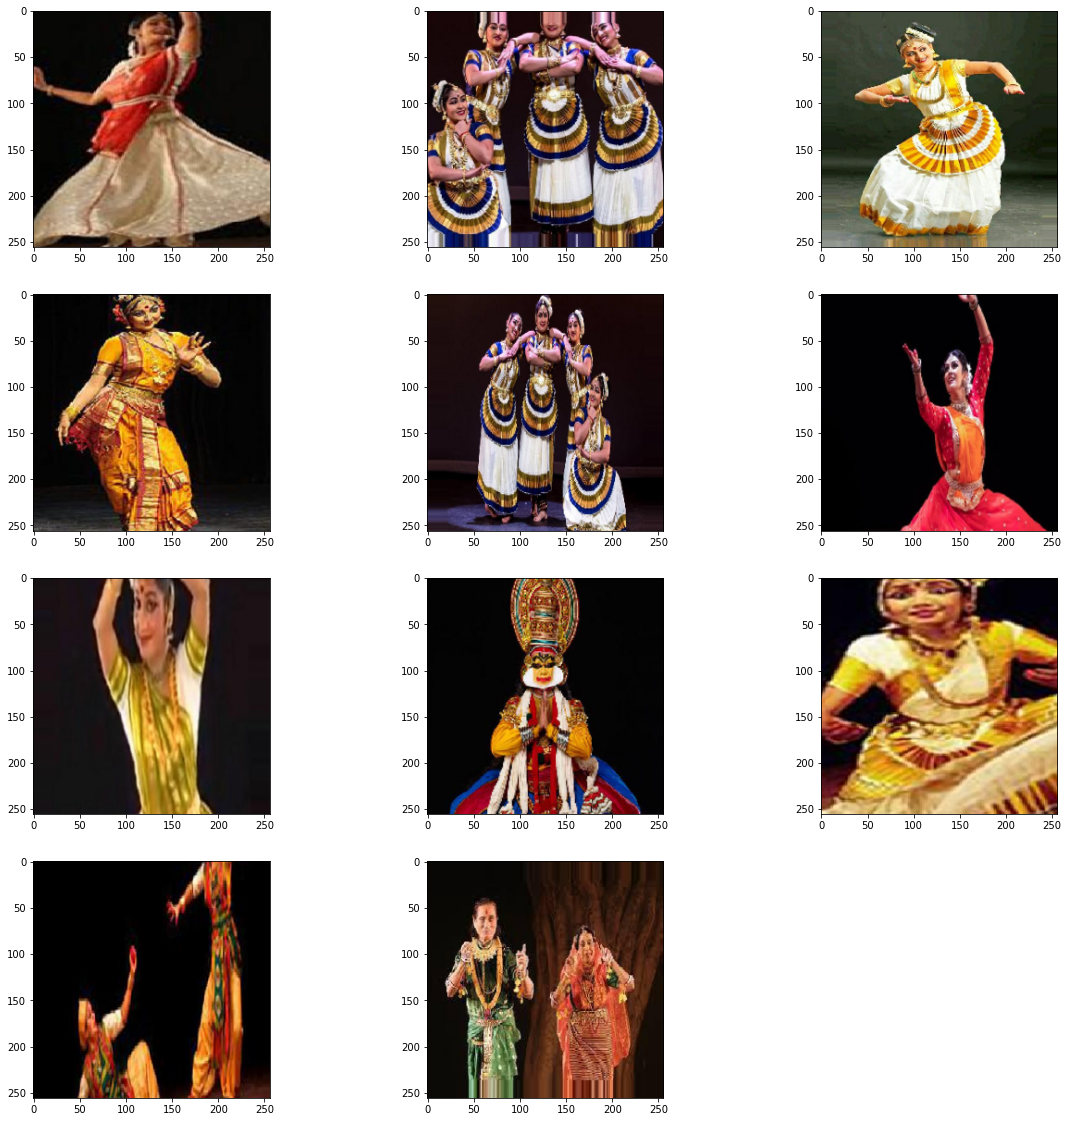

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==12):
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][31])

In [7]:
x_train.class_indices

{'bharatanatyam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

In [8]:
cnn = Sequential()

In [9]:
cnn.add(Conv2D(filters = 32, kernel_size=(3,3), strides = (2,2), 
               input_shape = (256,256,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

In [10]:
cnn.add(Conv2D(filters = 32, kernel_size=(3,3), strides = (2,2), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(kernel_initializer="random_uniform",activation="relu",units=500))
cnn.add(Dense(kernel_initializer="random_uniform",activation="relu",units=500))
cnn.add(Dense(kernel_initializer="random_uniform",activation="relu",units=500))

In [20]:
cnn.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=8))

In [21]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 500)               3

In [23]:
3000/32

93.75

In [24]:
1000/32

31.25

In [25]:
cnn.fit_generator(x_train,epochs=10,validation_data=x_test,validation_steps=31)

C:\Users\SIREES~1\AppData\Local\Temp/ipykernel_19036/238329443.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(x_train,epochs=10,validation_data=x_test,validation_steps=31)


Epoch 1/10
75/75 [==============================] - 95s 1s/step - loss: 2.0789 - accuracy: 0.1483 - val_loss: 2.0793 - val_accuracy: 0.1287
Epoch 2/10
75/75 [==============================] - 68s 906ms/step - loss: 2.0757 - accuracy: 0.1550
Epoch 3/10
75/75 [==============================] - 69s 915ms/step - loss: 2.0687 - accuracy: 0.1796
Epoch 4/10
75/75 [==============================] - 71s 941ms/step - loss: 2.0724 - accuracy: 0.1529
Epoch 5/10
75/75 [==============================] - 71s 943ms/step - loss: 2.0809 - accuracy: 0.1108
Epoch 6/10
75/75 [==============================] - 68s 913ms/step - loss: 2.0803 - accuracy: 0.1117
Epoch 7/10
75/75 [==============================] - 68s 902ms/step - loss: 2.0800 - accuracy: 0.1187
Epoch 8/10
75/75 [==============================] - 68s 905ms/step - loss: 2.0801 - accuracy: 0.1175
Epoch 9/10
75/75 [==============================] - 68s 906ms/step - loss: 2.0798 - accuracy: 0.1167
Epoch 10/10
75/75 [==============================] -

In [26]:
cnn.save("danceforms.h5")

In [27]:
from keras.models import load_model
import cv2
import numpy as np

In [28]:
cnnmodel = load_model("danceforms.h5")

In [29]:
def detect(frame):
    img=cv2.resize(frame,(256,256))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #scaling to 0 to 1 range 
    if(np.max(img)>1):
            img = img/255.0
    img = np.array([img])
    prediction = cnnmodel.predict(img)
    label=['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri', 'mohiniyattam',
                   'odissi', 'sattriya']
    prediction = np.argmax(prediction)
    print("Prediction:",prediction)
    return plt.imshow(img[0]),print(label[prediction])

In [40]:
image = cv2.imread("C:/Users/Sireesha Kuchimanchi/Downloads/Kuchipudi.jpg")

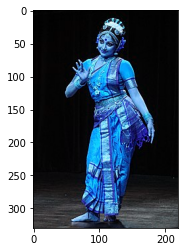

In [41]:
import matplotlib.pyplot as plt
plt.imshow(image)

1/1 [==============================] - 5s 5s/step
Prediction: 5
mohiniyattam


(<matplotlib.image.AxesImage at 0x164422cb760>, None)

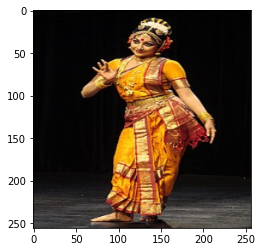

In [42]:
detect(image)